In [1]:
import cobra
import os
import glob
import pandas as pd

# Matplotlib defaults
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mticker
matplotlib.rcParams["savefig.dpi"] = 300
matplotlib.rcParams['figure.dpi'] = 300
#Rivanna fonts should include sans-serif now, but this could still raise an error
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

SMALLER_SIZE = 8
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALLER_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
model_dict_json = dict()
path = "/home/mac9jc/paradigm/models/"
os.chdir(path)

for filename in glob.glob(os.path.join(path, 'final_denovo_*.json')):
    key = filename.split('/')[len(filename.split('/'))-1]
    key = key[:-5]
    key = key[13:]
    model_dict_json[key] = cobra.io.load_json_model(filename)
    
model_dict_gf = dict()

#for filename in glob.glob(os.path.join(path, 'gf_*.xml')):
#    key = filename.split('/')[len(filename.split('/'))-1]
#    key = key[:-4]
#    key = key[3:]
#    if key.startswith('P'):
#        key = key #GOOD
#    else: # key.startswith('no_ortho')
#        if key == 'no_ortho_PneurophiliaMK1':
 #           key = key[9:]
  #      elif key == 'no_ortho_PconfusumCUL13':
   #         key = key[9:]
    #    else:
     #       key = key[9:]
      #      if key.startswith('P') : key = 'NA'
       #     else: 
        #        key = key
#    if key != 'NA':
 #       model_dict_gf[key] = cobra.io.read_sbml_model(filename)
        
for filename in glob.glob(os.path.join(path, 'gf_*.xml')):
    key = filename.split('/')[len(filename.split('/'))-1]
    key = key[:-4]
    key = key[3:]
    if key.startswith('P'):
        key = key #GOOD
    else: key = 'NA'
    if key != 'NA':
        model_dict_gf[key] = cobra.io.read_sbml_model(filename)
        
del model_dict_json['TgondiiRH'] #del model_dict_gf['TgondiiRH']
del model_dict_json['GintestinalisAssemblageAWB'] #del model_dict_gf['GintestinalisAssemblageAWB']
del model_dict_json['Pvivax-likePvl01']

In [3]:
gene_file = pd.read_csv('/home/mac9jc/paradigm/data/EuPathDB_GOTerms_metabolic_process.txt', sep="\t")
#model_dict_gf['LmajorSD75.1'] = model_dict_gf.pop('LmajorSD75')
gene_file['Organism'] = gene_file['Organism'].str.replace('. ','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace(' strain ','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('subsp','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace(' ','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace(':','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('-','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('/','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('isolate','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('strain','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('LdonovaniCLSL','LdonovaniCL-SL', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('EhistolyticaHM1IMSSA','EhistolyticaHM1IMSS-A', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('AcastellaniistrNeff','AcastellaniiNeff', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziCLBrenerNonEsmeraldolike','TcruziCLBrenerNon-Esmeraldo-like', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('NcaninumLiverpool','NcaninumLIV', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('PknowlesiMalayanStrainPk1A','PknowlesiMalayanPk1A', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TgondiiGAB22007GALDOM2','TgondiiGAB2-2007-GAL-DOM2', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('EcuniculiEcunIIIL','EcuniculiEcunIII-L', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('EhistolyticaHM1IMSSB','EhistolyticaHM1IMSS-B', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('HhammondiH.H.34','HhammondiHH34', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziSylvioX1012012','TcruziSylvioX10-1-2012', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('BayalaiB08376','BayalaiB08-376', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziSylvioX101','TcruziSylvioX10-1', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziCLBrenerEsmeraldolike','TcruziCLBrenerEsmeraldo-like', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageBGS','GintestinalisAssemblageBGS', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageBGS_B','GintestinalisAssemblageBGS_B', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageEP15','GintestinalisAssemblageEP15', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TbruceibruceiTREU927','TbruceiTREU927', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('PrelictumSGS1like','PrelictumSGS1-like', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageA2DH','GintestinalisAssemblageADH', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TbruceiLister4272018','TbruceiLister427_2018', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('PvivaxlikePvl01','Pvivax-likePvl01', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('Pfragilenilgiri','PfragileNilgiri', regex=False)
#gene_file['Organism'] = gene_file['Organism'].str.replace('','TgondiiRH', regex=False)
#gene_file['Organism'] = gene_file['Organism'].str.replace('','GintestinalisAssemblageAWB', regex=False)


In [4]:

gene_not_in_model = dict()

for species, model in model_dict_json.items():
     
    #subset gene_file for species
    temp_gene_file = gene_file[gene_file['Organism'].str.lower() == species.lower()]
    
    #preallocate - DE NOVO MODEL
    species_gene_not_in_model = dict()
    model_version = 'de novo'
    
    #assess genes - DE NOVO MODEL
    for row in temp_gene_file.iterrows():
        row_use = row[1]
        gene = row_use['Gene ID']
        model_genes0 = [g.id.split('-')[0] for g in model.genes]
        model_genes1 = [g.id.split('.')[0] for g in model.genes]
        model_genes2 = [g.id.split(':')[0] for g in model.genes]
        if 'rna_' in [g.id[0:4] for g in model.genes]:
            model_genes3 = [g.id.split('rna_')[1].split('-')[0] for g in model.genes if g.id.startswith('rna_')]
        else: model_genes3 = []
        model_genes4 = [g.id.split('A-')[0] for g in model.genes]
        model_genes5 = [g.id.split('.1-p1')[0] for g in model.genes]
        model_genes6 = [g.id.split('.mRNA')[0] for g in model.genes]
        model_genes = model_genes0 + model_genes1 + model_genes2 + model_genes3 + model_genes4 + model_genes5 + model_genes6
        if gene not in model_genes:
            EC = row_use['EC numbers']
            name = row_use['Product Description']
            GO2 = row_use['Curated GO Functions']
            GO1 = row_use['Computed GO Functions']
            gene_not_in_model[gene] = {'species':species,'model_version':model_version,'EC':EC, 'name':name,'GO, curated':GO1,'GO, computed':GO2}
    
    #preallocate - GAPFILLED MODEL
    species_gene_not_in_model = dict()
    species_count_with_EC = 0
    model_version = 'gf'
    
    #get other model
    if species in model_dict_gf.keys():
        model_gf = model_dict_gf[species]
        
        #assess genes - GAPFILLED MODEL
        for row in temp_gene_file.iterrows():
            row_use = row[1]
            gene = row_use['Gene ID']
            model_genes0 = [g.id.split('-')[0] for g in model_gf.genes]
            model_genes1 = [g.id.split('.')[0] for g in model_gf.genes]
            model_genes2 = [g.id.split(':')[0] for g in model_gf.genes]
            if 'rna_' in [g.id[0:4] for g in model.genes]:
                model_genes3 = [g.id.split('rna_')[1].split('-')[0] for g in model.genes if g.id.startswith('rna_')]
            else: model_genes3 = []
            model_genes4 = [g.id.split('A-')[0] for g in model_gf.genes]
            model_genes5 = [g.id.split('.1-p1')[0] for g in model.genes]
            model_genes6 = [g.id.split('.mRNA')[0] for g in model.genes]
            model_genes = model_genes0 + model_genes1 + model_genes2 + model_genes3 + model_genes4 + model_genes5 + model_genes6
            if gene not in model_genes:
                EC = row_use['EC numbers']
                name = row_use['Product Description']
                GO2 = row_use['Curated GO Functions']
                GO1 = row_use['Computed GO Functions']
                gene_not_in_model[gene] = {'species':species,'model_version':model_version,'EC':EC, 'name':name,'GO, curated':GO1,'GO, computed':GO2}
    
df = pd.DataFrame.from_dict(gene_not_in_model, orient='index')


In [5]:
df_denovo = df[df['model_version'] == 'de novo']
df_gf = df[df['model_version'] == 'gf']
dict_genes = dict()
for species in model_dict_json.keys():
    species_df = gene_file[gene_file['Organism'] == species]
    N_EuPathDB_genes = species_df.shape[0]
    species_denovo_df = df_denovo[df_denovo['species'] == species]
    N_missing_from_denovo = species_denovo_df.shape[0]
    species_gf_df = df_gf[df_gf['species'] == species]
    N_missing_from_gf = species_gf_df.shape[0]
    if species not in model_dict_gf.keys(): N_missing_from_gf = 'NaN'
    dict_genes[species] = {'EuPathDB genes' : N_EuPathDB_genes,
                           '# missing\nfrom de novo' : N_missing_from_denovo,
                          '# missing\nfrom semi-curated' : N_missing_from_gf}
    
data_all = pd.DataFrame.from_dict(dict_genes, orient='index')
data_all.head()

,EuPathDB genes,# missing from de novo,# missing from semi-curated
AalgeraePRA109,613,493,NaN
AalgeraePRA339,447,343,NaN
AcastellaniiNeff,2637,1980,NaN
AspWSBS2006,577,462,NaN
BayalaiB08-376,1246,907,NaN


In [6]:
# percent of genes that have GO terms and EC and are not in model

dict_genes_temp = dict()
dict_genes = dict()
for species in model_dict_json.keys():
    species_df = gene_file[gene_file['Organism'] == species]
    N_EuPathDB_genes_withoutEC = species_df[species_df['EC numbers'] != species_df['EC numbers']].shape[0]
    percent_EuPathDB_genes_withoutEC = 100* N_EuPathDB_genes_withoutEC/species_df.shape[0]
    species_denovo_df = df_denovo[df_denovo['species'] == species]
    N_missing_from_denovo_withoutEC = species_denovo_df[species_denovo_df['EC'] != species_denovo_df['EC']].shape[0]
    percent_missing_from_denovo_withoutEC = 100* N_missing_from_denovo_withoutEC/species_denovo_df.shape[0]
    species_gf_df = df_gf[df_gf['species'] == species]
    N_missing_from_gf_withoutEC = species_gf_df[species_gf_df['EC'] != species_gf_df['EC']].shape[0]
    if species not in model_dict_gf.keys(): 
        N_missing_from_gf = 'NaN'
        percent_missing_from_gf_withoutEC = 'NaN'
    else:
        percent_missing_from_gf_withoutEC = 100* N_missing_from_gf_withoutEC/species_gf_df.shape[0]
    dict_genes[species] = {'all annotations' : percent_EuPathDB_genes_withoutEC,
                           'omitted from\nde novo' : percent_missing_from_denovo_withoutEC,
                          'omitted from\nsemi-curated' : percent_missing_from_gf_withoutEC}
    dict_genes_temp[species] = {'all annotations' : N_EuPathDB_genes_withoutEC,
                           'omitted from\nde novo' : N_missing_from_denovo_withoutEC,
                          'omitted from\nsemi-curated' : N_missing_from_gf_withoutEC}
    
EC_data = pd.DataFrame.from_dict(dict_genes, orient='index')
EC_data.head()


,all annotations,omitted from de novo,omitted from semi-curated
AalgeraePRA109,100.000000,100.000000,NaN
AalgeraePRA339,85.234899,88.629738,NaN
AcastellaniiNeff,88.357983,91.515152,NaN
AspWSBS2006,100.000000,100.000000,NaN
BayalaiB08-376,100.000000,100.000000,NaN


In [7]:

gene_IN_model = list()

for species, model in model_dict_json.items():
     
    #subset gene_file for species
    temp_gene_file = gene_file[gene_file['Organism'].str.lower() == species.lower()]
    EuPathDB_list = temp_gene_file['Gene ID'].tolist()
    
    #assess genes - DE NOVO MODEL
    model_version = 'de novo'
    for g in model.genes:
        gene = g.id
        gene_options = [gene.split('-')[0], gene.split('.')[0], gene.split(':')[0], gene.split('A-')[0],
                       gene.split('.1-p1')[0], gene.split('.mRNA')[0]]
        if 'rna_' in gene[0:4]:
            gene_options = gene_options + [gene.split('rna_')[1].split('-')[0]]
        if any(item in EuPathDB_list for item in gene_options):
            gene_IN_model.append({'species':species,'gene':g.id,
                                  'model_version':model_version,'present?':'present'})
        else:
            gene_IN_model.append({'species':species,'gene':g.id,
                                  'model_version':model_version,'present?':'absent'})
    
    #assess genes - GAPFILLED (SEMI-CURATED) MODEL
    model_version = 'gf'
    if species in model_dict_gf.keys():
        model_gf = model_dict_gf[species]
        
        #assess genes - GAPFILLED MODEL
        for g in model.genes:
            gene = g.id
            gene_options = [gene.split('-')[0], gene.split('.')[0], gene.split(':')[0], gene.split('A-')[0],
                           gene.split('.1-p1')[0], gene.split('.mRNA')[0]]
            if 'rna_' in gene[0:4]:
                gene_options = gene_options + [gene.split('rna_')[1].split('-')[0]]
            if any(item in EuPathDB_list for item in gene_options):
                gene_IN_model.append({'species':species,'gene':g.id,
                                      'model_version':model_version,
                                      'present?':'present'})
            else:
                gene_IN_model.append({'species':species,'gene':g.id,
                                      'model_version':model_version,
                                      'present?':'absent'})
            
    
df = pd.DataFrame(gene_IN_model)

In [8]:
df[df['model_version'] == 'de novo'].head()

,gene,model_version,present?,species
0,DI09_11p170-t26_1-p1,de novo,absent,MdaphniaeUGP3
1,DI09_106p100-t26_1-p1,de novo,absent,MdaphniaeUGP3
2,DI09_16p200-t26_1-p1,de novo,present,MdaphniaeUGP3
3,DI09_32p150-t26_1-p1,de novo,absent,MdaphniaeUGP3
4,DI09_57p130-t26_1-p1,de novo,present,MdaphniaeUGP3


In [9]:
 
df_denovo = df[df['model_version'] == 'de novo']
df_gf = df[df['model_version'] == 'gf']

df_ab_denovo = df_denovo[df_denovo['present?'] =='absent']
df_pres_denovo = df_denovo[df_denovo['present?'] =='present']

df_ab_gf = df_gf[df_gf['present?'] =='absent']
df_pres_gf = df_gf[df_gf['present?'] =='present']

dict_genes = dict()
for species in model_dict_json.keys():
    
    N_EuPathDB_genes_in_model_denovo = df_pres_denovo[df_pres_denovo['species'] == species].shape[0]
    N_EuPathDB_genes_in_model_gf = df_pres_gf[df_pres_gf['species'] == species].shape[0]
    N_genes_in_model_not_on_EuPathDB_denovo = df_ab_denovo[df_ab_denovo['species'] == species].shape[0]
    N_genes_in_model_not_on_EuPathDB_gf = df_ab_gf[df_ab_gf['species'] == species].shape[0]
    
    if species not in model_dict_gf.keys(): 
        N_EuPathDB_genes_in_model_gf = 'NaN' 
        N_genes_in_model_not_on_EuPathDB_gf = 'NaN'
        
    dict_genes[species] = {'absent from\nEuPathDB\n(de novo)':N_genes_in_model_not_on_EuPathDB_denovo,
                          'absent from\nEuPathDB\n(semi-curated)':N_genes_in_model_not_on_EuPathDB_gf,
                          'on EuPathDB\n(de novo)':N_EuPathDB_genes_in_model_denovo,
                          'on EuPathDB\n(semi-curated)':N_EuPathDB_genes_in_model_gf}
    
data_opp = pd.DataFrame.from_dict(dict_genes, orient='index')
data_opp.head()

,absent from EuPathDB (de novo),absent from EuPathDB (semi-curated),on EuPathDB (de novo),on EuPathDB (semi-curated)
AalgeraePRA109,89,NaN,120,NaN
AalgeraePRA339,85,NaN,104,NaN
AcastellaniiNeff,455,NaN,657,NaN
AspWSBS2006,78,NaN,115,NaN
BayalaiB08-376,252,NaN,339,NaN


In [10]:
gene_file = pd.read_csv('/home/mac9jc/paradigm/data/EuPathDB_GOTerms_amino_acid.txt', sep="\t")
#model_dict_gf['LmajorSD75.1'] = model_dict_gf.pop('LmajorSD75')
gene_file['Organism'] = gene_file['Organism'].str.replace('. ','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace(' strain ','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('subsp','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace(' ','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace(':','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('-','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('/','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('isolate','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('strain','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('LdonovaniCLSL','LdonovaniCL-SL', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('EhistolyticaHM1IMSSA','EhistolyticaHM1IMSS-A', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('AcastellaniistrNeff','AcastellaniiNeff', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziCLBrenerNonEsmeraldolike','TcruziCLBrenerNon-Esmeraldo-like', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('NcaninumLiverpool','NcaninumLIV', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('PknowlesiMalayanStrainPk1A','PknowlesiMalayanPk1A', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TgondiiGAB22007GALDOM2','TgondiiGAB2-2007-GAL-DOM2', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('EcuniculiEcunIIIL','EcuniculiEcunIII-L', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('EhistolyticaHM1IMSSB','EhistolyticaHM1IMSS-B', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('HhammondiH.H.34','HhammondiHH34', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziSylvioX1012012','TcruziSylvioX10-1-2012', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('BayalaiB08376','BayalaiB08-376', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziSylvioX101','TcruziSylvioX10-1', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziCLBrenerEsmeraldolike','TcruziCLBrenerEsmeraldo-like', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageBGS','GintestinalisAssemblageBGS', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageBGS_B','GintestinalisAssemblageBGS_B', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageEP15','GintestinalisAssemblageEP15', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TbruceibruceiTREU927','TbruceiTREU927', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('PrelictumSGS1like','PrelictumSGS1-like', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageA2DH','GintestinalisAssemblageADH', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TbruceiLister4272018','TbruceiLister427_2018', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('PvivaxlikePvl01','Pvivax-likePvl01', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('Pfragilenilgiri','PfragileNilgiri', regex=False)
#gene_file['Organism'] = gene_file['Organism'].str.replace('','TgondiiRH', regex=False)
#gene_file['Organism'] = gene_file['Organism'].str.replace('','GintestinalisAssemblageAWB', regex=False)

gene_not_in_model = dict()

for species, model in model_dict_json.items():
     
    #subset gene_file for species
    temp_gene_file = gene_file[gene_file['Organism'].str.lower() == species.lower()]
    
    #preallocate - DE NOVO MODEL
    species_gene_not_in_model = dict()
    model_version = 'de novo'
    
    #assess genes - DE NOVO MODEL
    for row in temp_gene_file.iterrows():
        row_use = row[1]
        gene = row_use['Gene ID']
        model_genes0 = [g.id.split('-')[0] for g in model.genes]
        model_genes1 = [g.id.split('.')[0] for g in model.genes]
        model_genes2 = [g.id.split(':')[0] for g in model.genes]
        if 'rna_' in [g.id[0:4] for g in model.genes]:
            model_genes3 = [g.id.split('rna_')[1].split('-')[0] for g in model.genes if g.id.startswith('rna_')]
        else: model_genes3 = []
        model_genes4 = [g.id.split('A-')[0] for g in model.genes]
        model_genes5 = [g.id.split('.1-p1')[0] for g in model.genes]
        model_genes6 = [g.id.split('.mRNA')[0] for g in model.genes]
        model_genes = model_genes0 + model_genes1 + model_genes2 + model_genes3 + model_genes4 + model_genes5 + model_genes6
        if gene not in model_genes:
            EC = row_use['EC numbers']
            name = row_use['Product Description']
            GO2 = row_use['Curated GO Functions']
            GO1 = row_use['Computed GO Functions']
            gene_not_in_model[gene] = {'species':species,'model_version':model_version,'EC':EC, 'name':name,'GO, curated':GO1,'GO, computed':GO2}
    
    #preallocate - GAPFILLED MODEL
    species_gene_not_in_model = dict()
    species_count_with_EC = 0
    model_version = 'gf'
    
    #get other model
    if species in model_dict_gf.keys():
        model_gf = model_dict_gf[species]
        
        #assess genes - GAPFILLED MODEL
        for row in temp_gene_file.iterrows():
            row_use = row[1]
            gene = row_use['Gene ID']
            model_genes0 = [g.id.split('-')[0] for g in model_gf.genes]
            model_genes1 = [g.id.split('.')[0] for g in model_gf.genes]
            model_genes2 = [g.id.split(':')[0] for g in model_gf.genes]
            if 'rna_' in [g.id[0:4] for g in model.genes]:
                model_genes3 = [g.id.split('rna_')[1].split('-')[0] for g in model.genes if g.id.startswith('rna_')]
            else: model_genes3 = []
            model_genes4 = [g.id.split('A-')[0] for g in model_gf.genes]
            model_genes5 = [g.id.split('.1-p1')[0] for g in model.genes]
            model_genes6 = [g.id.split('.mRNA')[0] for g in model.genes]
            model_genes = model_genes0 + model_genes1 + model_genes2 + model_genes3 + model_genes4 + model_genes5 + model_genes6
            if gene not in model_genes:
                EC = row_use['EC numbers']
                name = row_use['Product Description']
                GO2 = row_use['Curated GO Functions']
                GO1 = row_use['Computed GO Functions']
                gene_not_in_model[gene] = {'species':species,'model_version':model_version,'EC':EC, 'name':name,'GO, curated':GO1,'GO, computed':GO2}
    
df = pd.DataFrame.from_dict(gene_not_in_model, orient='index')

df_denovo = df[df['model_version'] == 'de novo']
df_gf = df[df['model_version'] == 'gf']
dict_genes = dict()
for species in model_dict_json.keys():
    species_df = gene_file[gene_file['Organism'] == species]
    N_EuPathDB_genes = species_df.shape[0]
    species_denovo_df = df_denovo[df_denovo['species'] == species]
    N_missing_from_denovo = species_denovo_df.shape[0]
    species_gf_df = df_gf[df_gf['species'] == species]
    N_missing_from_gf = species_gf_df.shape[0]
    if species not in model_dict_gf.keys(): N_missing_from_gf = 'NaN'
    dict_genes[species] = {'EuPathDB genes' : N_EuPathDB_genes,
                           '# missing\nfrom de novo' : N_missing_from_denovo,
                          '# missing\nfrom semi-curated' : N_missing_from_gf}
    
data_amino = pd.DataFrame.from_dict(dict_genes, orient='index')
data_amino.head()

,EuPathDB genes,# missing from de novo,# missing from semi-curated
AalgeraePRA109,35,9,NaN
AalgeraePRA339,23,0,NaN
AcastellaniiNeff,110,11,NaN
AspWSBS2006,28,1,NaN
BayalaiB08-376,53,3,NaN


In [11]:
gene_file = pd.read_csv('/home/mac9jc/paradigm/data/EuPathDB_GOTerm_nucleotide.txt', sep="\t")
#model_dict_gf['LmajorSD75.1'] = model_dict_gf.pop('LmajorSD75')
gene_file['Organism'] = gene_file['Organism'].str.replace('. ','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace(' strain ','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('subsp','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace(' ','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace(':','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('-','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('/','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('isolate','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('strain','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('LdonovaniCLSL','LdonovaniCL-SL', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('EhistolyticaHM1IMSSA','EhistolyticaHM1IMSS-A', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('AcastellaniistrNeff','AcastellaniiNeff', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziCLBrenerNonEsmeraldolike','TcruziCLBrenerNon-Esmeraldo-like', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('NcaninumLiverpool','NcaninumLIV', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('PknowlesiMalayanStrainPk1A','PknowlesiMalayanPk1A', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TgondiiGAB22007GALDOM2','TgondiiGAB2-2007-GAL-DOM2', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('EcuniculiEcunIIIL','EcuniculiEcunIII-L', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('EhistolyticaHM1IMSSB','EhistolyticaHM1IMSS-B', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('HhammondiH.H.34','HhammondiHH34', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziSylvioX1012012','TcruziSylvioX10-1-2012', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('BayalaiB08376','BayalaiB08-376', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziSylvioX101','TcruziSylvioX10-1', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziCLBrenerEsmeraldolike','TcruziCLBrenerEsmeraldo-like', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageBGS','GintestinalisAssemblageBGS', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageBGS_B','GintestinalisAssemblageBGS_B', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageEP15','GintestinalisAssemblageEP15', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TbruceibruceiTREU927','TbruceiTREU927', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('PrelictumSGS1like','PrelictumSGS1-like', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageA2DH','GintestinalisAssemblageADH', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TbruceiLister4272018','TbruceiLister427_2018', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('PvivaxlikePvl01','Pvivax-likePvl01', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('Pfragilenilgiri','PfragileNilgiri', regex=False)
#gene_file['Organism'] = gene_file['Organism'].str.replace('','TgondiiRH', regex=False)
#gene_file['Organism'] = gene_file['Organism'].str.replace('','GintestinalisAssemblageAWB', regex=False)

gene_not_in_model = dict()

for species, model in model_dict_json.items():
     
    #subset gene_file for species
    temp_gene_file = gene_file[gene_file['Organism'].str.lower() == species.lower()]
    
    #preallocate - DE NOVO MODEL
    species_gene_not_in_model = dict()
    model_version = 'de novo'
    
    #assess genes - DE NOVO MODEL
    for row in temp_gene_file.iterrows():
        row_use = row[1]
        gene = row_use['Gene ID']
        model_genes0 = [g.id.split('-')[0] for g in model.genes]
        model_genes1 = [g.id.split('.')[0] for g in model.genes]
        model_genes2 = [g.id.split(':')[0] for g in model.genes]
        if 'rna_' in [g.id[0:4] for g in model.genes]:
            model_genes3 = [g.id.split('rna_')[1].split('-')[0] for g in model.genes if g.id.startswith('rna_')]
        else: model_genes3 = []
        model_genes4 = [g.id.split('A-')[0] for g in model.genes]
        model_genes5 = [g.id.split('.1-p1')[0] for g in model.genes]
        model_genes6 = [g.id.split('.mRNA')[0] for g in model.genes]
        model_genes = model_genes0 + model_genes1 + model_genes2 + model_genes3 + model_genes4 + model_genes5 + model_genes6
        if gene not in model_genes:
            EC = row_use['EC numbers']
            name = row_use['Product Description']
            GO2 = row_use['Curated GO Functions']
            GO1 = row_use['Computed GO Functions']
            gene_not_in_model[gene] = {'species':species,'model_version':model_version,'EC':EC, 'name':name,'GO, curated':GO1,'GO, computed':GO2}
    
    #preallocate - GAPFILLED MODEL
    species_gene_not_in_model = dict()
    species_count_with_EC = 0
    model_version = 'gf'
    
    #get other model
    if species in model_dict_gf.keys():
        model_gf = model_dict_gf[species]
        
        #assess genes - GAPFILLED MODEL
        for row in temp_gene_file.iterrows():
            row_use = row[1]
            gene = row_use['Gene ID']
            model_genes0 = [g.id.split('-')[0] for g in model_gf.genes]
            model_genes1 = [g.id.split('.')[0] for g in model_gf.genes]
            model_genes2 = [g.id.split(':')[0] for g in model_gf.genes]
            if 'rna_' in [g.id[0:4] for g in model.genes]:
                model_genes3 = [g.id.split('rna_')[1].split('-')[0] for g in model.genes if g.id.startswith('rna_')]
            else: model_genes3 = []
            model_genes4 = [g.id.split('A-')[0] for g in model_gf.genes]
            model_genes5 = [g.id.split('.1-p1')[0] for g in model.genes]
            model_genes6 = [g.id.split('.mRNA')[0] for g in model.genes]
            model_genes = model_genes0 + model_genes1 + model_genes2 + model_genes3 + model_genes4 + model_genes5 + model_genes6
            if gene not in model_genes:
                EC = row_use['EC numbers']
                name = row_use['Product Description']
                GO2 = row_use['Curated GO Functions']
                GO1 = row_use['Computed GO Functions']
                gene_not_in_model[gene] = {'species':species,'model_version':model_version,'EC':EC, 'name':name,'GO, curated':GO1,'GO, computed':GO2}
    
df = pd.DataFrame.from_dict(gene_not_in_model, orient='index')

df_denovo = df[df['model_version'] == 'de novo']
df_gf = df[df['model_version'] == 'gf']
dict_genes = dict()
for species in model_dict_json.keys():
    species_df = gene_file[gene_file['Organism'] == species]
    N_EuPathDB_genes = species_df.shape[0]
    species_denovo_df = df_denovo[df_denovo['species'] == species]
    N_missing_from_denovo = species_denovo_df.shape[0]
    species_gf_df = df_gf[df_gf['species'] == species]
    N_missing_from_gf = species_gf_df.shape[0]
    if species not in model_dict_gf.keys(): N_missing_from_gf = 'NaN'
    dict_genes[species] = {'EuPathDB genes' : N_EuPathDB_genes,
                           '# missing\nfrom de novo' : N_missing_from_denovo,
                          '# missing\nfrom semi-curated' : N_missing_from_gf}
    
data_nucleotides = pd.DataFrame.from_dict(dict_genes, orient='index')
data_nucleotides.head()


,EuPathDB genes,# missing from de novo,# missing from semi-curated
AalgeraePRA109,17,1,NaN
AalgeraePRA339,10,1,NaN
AcastellaniiNeff,118,73,NaN
AspWSBS2006,13,0,NaN
BayalaiB08-376,39,6,NaN


In [12]:
gene_file = pd.read_csv('/home/mac9jc/paradigm/data/EuPathDB_GOTerm_transport.txt', sep="\t")
#model_dict_gf['LmajorSD75.1'] = model_dict_gf.pop('LmajorSD75')
gene_file['Organism'] = gene_file['Organism'].str.replace('. ','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace(' strain ','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('subsp','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace(' ','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace(':','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('-','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('/','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('isolate','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('strain','', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('LdonovaniCLSL','LdonovaniCL-SL', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('EhistolyticaHM1IMSSA','EhistolyticaHM1IMSS-A', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('AcastellaniistrNeff','AcastellaniiNeff', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziCLBrenerNonEsmeraldolike','TcruziCLBrenerNon-Esmeraldo-like', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('NcaninumLiverpool','NcaninumLIV', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('PknowlesiMalayanStrainPk1A','PknowlesiMalayanPk1A', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TgondiiGAB22007GALDOM2','TgondiiGAB2-2007-GAL-DOM2', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('EcuniculiEcunIIIL','EcuniculiEcunIII-L', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('EhistolyticaHM1IMSSB','EhistolyticaHM1IMSS-B', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('HhammondiH.H.34','HhammondiHH34', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziSylvioX1012012','TcruziSylvioX10-1-2012', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('BayalaiB08376','BayalaiB08-376', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziSylvioX101','TcruziSylvioX10-1', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TcruziCLBrenerEsmeraldolike','TcruziCLBrenerEsmeraldo-like', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageBGS','GintestinalisAssemblageBGS', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageBGS_B','GintestinalisAssemblageBGS_B', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageEP15','GintestinalisAssemblageEP15', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TbruceibruceiTREU927','TbruceiTREU927', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('PrelictumSGS1like','PrelictumSGS1-like', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('GAssemblageA2DH','GintestinalisAssemblageADH', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('TbruceiLister4272018','TbruceiLister427_2018', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('PvivaxlikePvl01','Pvivax-likePvl01', regex=False)
gene_file['Organism'] = gene_file['Organism'].str.replace('Pfragilenilgiri','PfragileNilgiri', regex=False)
#gene_file['Organism'] = gene_file['Organism'].str.replace('','TgondiiRH', regex=False)
#gene_file['Organism'] = gene_file['Organism'].str.replace('','GintestinalisAssemblageAWB', regex=False)

gene_not_in_model = dict()

for species, model in model_dict_json.items():
     
    #subset gene_file for species
    temp_gene_file = gene_file[gene_file['Organism'].str.lower() == species.lower()]
    
    #preallocate - DE NOVO MODEL
    species_gene_not_in_model = dict()
    model_version = 'de novo'
    
    #assess genes - DE NOVO MODEL
    for row in temp_gene_file.iterrows():
        row_use = row[1]
        gene = row_use['Gene ID']
        model_genes0 = [g.id.split('-')[0] for g in model.genes]
        model_genes1 = [g.id.split('.')[0] for g in model.genes]
        model_genes2 = [g.id.split(':')[0] for g in model.genes]
        if 'rna_' in [g.id[0:4] for g in model.genes]:
            model_genes3 = [g.id.split('rna_')[1].split('-')[0] for g in model.genes if g.id.startswith('rna_')]
        else: model_genes3 = []
        model_genes4 = [g.id.split('A-')[0] for g in model.genes]
        model_genes5 = [g.id.split('.1-p1')[0] for g in model.genes]
        model_genes6 = [g.id.split('.mRNA')[0] for g in model.genes]
        model_genes = model_genes0 + model_genes1 + model_genes2 + model_genes3 + model_genes4 + model_genes5 + model_genes6
        if gene not in model_genes:
            EC = row_use['EC numbers']
            name = row_use['Product Description']
            GO2 = row_use['Curated GO Functions']
            GO1 = row_use['Computed GO Functions']
            gene_not_in_model[gene] = {'species':species,'model_version':model_version,'EC':EC, 'name':name,'GO, curated':GO1,'GO, computed':GO2}
    
    #preallocate - GAPFILLED MODEL
    species_gene_not_in_model = dict()
    species_count_with_EC = 0
    model_version = 'gf'
    
    #get other model
    if species in model_dict_gf.keys():
        model_gf = model_dict_gf[species]
        
        #assess genes - GAPFILLED MODEL
        for row in temp_gene_file.iterrows():
            row_use = row[1]
            gene = row_use['Gene ID']
            model_genes0 = [g.id.split('-')[0] for g in model_gf.genes]
            model_genes1 = [g.id.split('.')[0] for g in model_gf.genes]
            model_genes2 = [g.id.split(':')[0] for g in model_gf.genes]
            if 'rna_' in [g.id[0:4] for g in model.genes]:
                model_genes3 = [g.id.split('rna_')[1].split('-')[0] for g in model.genes if g.id.startswith('rna_')]
            else: model_genes3 = []
            model_genes4 = [g.id.split('A-')[0] for g in model_gf.genes]
            model_genes5 = [g.id.split('.1-p1')[0] for g in model.genes]
            model_genes6 = [g.id.split('.mRNA')[0] for g in model.genes]
            model_genes = model_genes0 + model_genes1 + model_genes2 + model_genes3 + model_genes4 + model_genes5 + model_genes6
            if gene not in model_genes:
                EC = row_use['EC numbers']
                name = row_use['Product Description']
                GO2 = row_use['Curated GO Functions']
                GO1 = row_use['Computed GO Functions']
                gene_not_in_model[gene] = {'species':species,'model_version':model_version,'EC':EC, 'name':name,'GO, curated':GO1,'GO, computed':GO2}
    
df = pd.DataFrame.from_dict(gene_not_in_model, orient='index')

df_denovo = df[df['model_version'] == 'de novo']
df_gf = df[df['model_version'] == 'gf']
dict_genes = dict()
for species in model_dict_json.keys():
    species_df = gene_file[gene_file['Organism'] == species]
    N_EuPathDB_genes = species_df.shape[0]
    species_denovo_df = df_denovo[df_denovo['species'] == species]
    N_missing_from_denovo = species_denovo_df.shape[0]
    species_gf_df = df_gf[df_gf['species'] == species]
    N_missing_from_gf = species_gf_df.shape[0]
    if species not in model_dict_gf.keys(): N_missing_from_gf = 'NaN'
    dict_genes[species] = {'EuPathDB genes' : N_EuPathDB_genes,
                           '# missing\nfrom de novo' : N_missing_from_denovo,
                          '# missing\nfrom semi-curated' : N_missing_from_gf}
    
data_transporters = pd.DataFrame.from_dict(dict_genes, orient='index')
data_transporters.head()

,EuPathDB genes,# missing from de novo,# missing from semi-curated
AalgeraePRA109,105,93,NaN
AalgeraePRA339,88,71,NaN
AcastellaniiNeff,423,335,NaN
AspWSBS2006,105,86,NaN
BayalaiB08-376,210,164,NaN


In [ ]:
# all annotations
fig,ax = plt.subplots(2, 2)
x1 = data_all['EuPathDB genes'].tolist()
x2 = data_all['# missing\nfrom de novo'].tolist()
x3 = [x for x in data_all['# missing\nfrom semi-curated'].tolist() if x != 'NaN']
bplot = ax[0,0].boxplot([x1,x2,x3],
                   showfliers=False, patch_artist=True,
                   labels = data_all.columns.tolist(),
                   medianprops = dict(color="black",linewidth=1.5)) 
ax[0,0].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
colors = ['white','grey','grey']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
ax[0,0].set_title('All metabolic annotations')

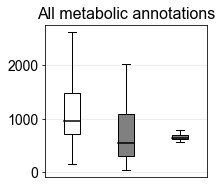

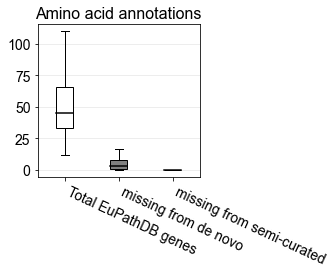

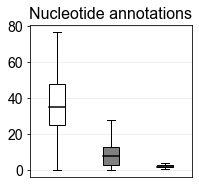

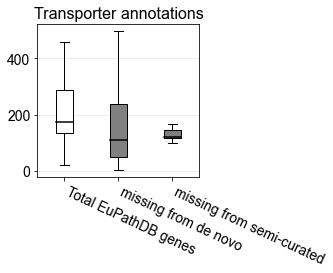

In [50]:
colors = ['white','grey','grey']

# all annotations
fig,ax = plt.subplots()
x1 = data_all['EuPathDB genes'].tolist()
x2 = data_all['# missing\nfrom de novo'].tolist()
x3 = [x for x in data_all['# missing\nfrom semi-curated'].tolist() if x != 'NaN']
bplot = ax.boxplot([x1,x2,x3],
                   showfliers=False, patch_artist=True,
                   labels = data_all.columns.tolist(),
                   medianprops = dict(color="black",linewidth=1.5)) 
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
ax.set_title('All metabolic annotations')
ax.axes.get_xaxis().set_visible(False)
plt.subplots_adjust(bottom = 0.35, right = 0.5)
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/EuPathDB_comparison_all_annotations.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/EuPathDB_comparison_all_annotations.png")

# amino acid annotations 
fig,ax = plt.subplots()
x1 = data_amino['EuPathDB genes'].tolist()
x2 = data_amino['# missing\nfrom de novo'].tolist()
x3 = [x for x in data_amino['# missing\nfrom semi-curated'].tolist() if x != 'NaN']
bplot = ax.boxplot([x1,x2,x3],
                   showfliers=False, patch_artist=True,
                   labels = data_all.columns.tolist(),
                   medianprops = dict(color="black",linewidth=1.5)) 
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
ax.set_title('Amino acid annotations')
ax.set_xticklabels(rotation=-25, ha='left', labels = ['Total EuPathDB genes','missing from de novo','missing from semi-curated'])
plt.subplots_adjust(bottom = 0.35, right = 0.5)
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/EuPathDB_comparison_AA_annotations.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/EuPathDB_comparison_AA_annotations.png")

# nucleotide annotations 
fig,ax = plt.subplots()
x1 = data_nucleotides['EuPathDB genes'].tolist()
x2 = data_nucleotides['# missing\nfrom de novo'].tolist()
x3 = [x for x in data_nucleotides['# missing\nfrom semi-curated'].tolist() if x != 'NaN']
bplot = ax.boxplot([x1,x2,x3],
                   showfliers=False, patch_artist=True,
                   labels = data_all.columns.tolist(),
                   medianprops = dict(color="black",linewidth=1.5)) 
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
ax.set_title('Nucleotide annotations')
ax.axes.get_xaxis().set_visible(False)
plt.subplots_adjust(bottom = 0.35, right = 0.5)
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/EuPathDB_comparison_NTs_annotations.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/EuPathDB_comparison_NTs_annotations.png")

# transporter annotations 
fig,ax = plt.subplots()
x1 = data_transporters['EuPathDB genes'].tolist()
x2 = data_transporters['# missing\nfrom de novo'].tolist()
x3 = [x for x in data_transporters['# missing\nfrom semi-curated'].tolist() if x != 'NaN']
bplot = ax.boxplot([x1,x2,x3],
                   showfliers=False, patch_artist=True,
                   labels = data_all.columns.tolist(),
                   medianprops = dict(color="black",linewidth=1.5)) 
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
ax.set_title('Transporter annotations')
ax.set_xticklabels(rotation=-25, ha='left', labels = ['Total EuPathDB genes','missing from de novo','missing from semi-curated'])
plt.subplots_adjust(bottom = 0.35, right = 0.5)
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/EuPathDB_comparison_transporter_annotations.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/EuPathDB_comparison_transporter_annotations.png")


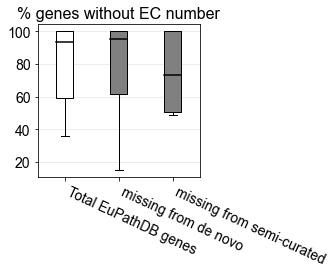

In [69]:
fig,ax = plt.subplots()
x1 = EC_data['all annotations'].tolist()
x2 = EC_data['omitted from\nde novo'].tolist()
x3 = [x for x in EC_data['omitted from\nsemi-curated'].tolist() if x != 'NaN']
bplot = ax.boxplot([x1,x2,x3],
                   showfliers=False, patch_artist=True,
                   labels = data_all.columns.tolist(),
                   medianprops = dict(color="black",linewidth=1.5)) 
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
colors = ['white','grey','grey']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
ax.set_title('% genes without EC number')
ax.set_xticklabels(rotation=-25, ha='left', labels = ['Total EuPathDB genes','missing from de novo','missing from semi-curated'])
plt.subplots_adjust(bottom = 0.35, right = 0.5)
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/EuPathDB_EC_eval.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/EuPathDB_EC_eval.png")



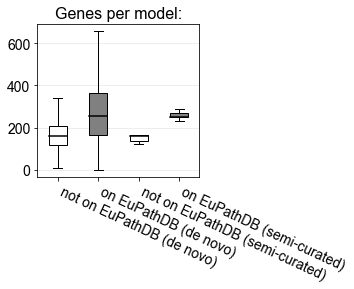

In [70]:
fig,ax = plt.subplots()
x1 = data_opp['absent from\nEuPathDB\n(de novo)'].tolist()
x2 = [x for x in data_opp['on EuPathDB\n(de novo)'].tolist() if x == x]
x3 = [x for x in data_opp['absent from\nEuPathDB\n(semi-curated)'].tolist() if x != 'NaN']
x4 = [x for x in data_opp['on EuPathDB\n(semi-curated)'].tolist() if x != 'NaN']
bplot = ax.boxplot([x1,x2,x3,x4],
                   showfliers=False, patch_artist=True,
                   labels = data_opp.columns.tolist(),
                   medianprops = dict(color="black",linewidth=1.5))  
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
colors = ['white','grey','white','grey']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
ax.set_title('Genes per model:')
ax.set_xticklabels(rotation=-25, ha='left', labels = ['not on EuPathDB (de novo)','on EuPathDB (de novo)','not on EuPathDB (semi-curated)','on EuPathDB (semi-curated)'])
plt.subplots_adjust(bottom = 0.35, right = 0.5)
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/Diamond_not_in_EuPathDB.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/Diamond_not_in_EuPathDB.png")

